In [ ]:
from google.colab import files
uploaded=files.upload()


Saving data.csv to data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

import datetime

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding

In [ ]:
#get the data
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,source,Rating,ReviewText,PUBLISH_TS,organisation
0,google,3 stars,NaN,2020-01-18 15:03:56.791524,ibis saint martin
1,google,5 stars,"Good hotel, not close to the sites of interest...",2020-01-18 15:03:56.791590,ibis saint martin
2,google,5 stars,Nice budget hotel for your stay in Paris..,2020-09-19 15:03:56.791618,ibis saint martin
3,google,5 stars,I was in Paris from 8 to 13 August at this fac...,2019-01-18 15:03:56.791656,ibis saint martin
4,google,1 stars,I stayed there for 3 nights. Besides the poor ...,2020-08-20 15:03:56.791677,ibis saint martin


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        2322 non-null   object
 1   Rating        2170 non-null   object
 2   ReviewText    1622 non-null   object
 3   PUBLISH_TS    2322 non-null   object
 4   organisation  2322 non-null   object
dtypes: object(5)
memory usage: 90.8+ KB


In [ ]:
data.shape

(2322, 5)

In [ ]:
data.isnull().sum(axis = 0)

source            0
Rating          152
ReviewText      700
PUBLISH_TS        0
organisation      0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.Rating.value_counts()

4 stars    551
3 stars    359
5 stars    340
2 stars    128
1 stars     92
Name: Rating, dtype: int64

In [ ]:
data.shape

(1470, 5)

In [ ]:
mod_data = data.iloc[:,1:3]

mod_data.head()

,Rating,ReviewText
1,5 stars,"Good hotel, not close to the sites of interest..."
2,5 stars,Nice budget hotel for your stay in Paris..
3,5 stars,I was in Paris from 8 to 13 August at this fac...
4,1 stars,I stayed there for 3 nights. Besides the poor ...
5,1 stars,Attention half mouth. Very expensive room. Tin...


In [ ]:
# Remove Units from Value List
mod_data['Rating'] = mod_data['Rating'].map(lambda x: str(x)[:1:])

In [ ]:
print(mod_data)

     Rating                                         ReviewText
1         5  Good hotel, not close to the sites of interest...
2         5         Nice budget hotel for your stay in Paris..
3         5  I was in Paris from 8 to 13 August at this fac...
4         1  I stayed there for 3 nights. Besides the poor ...
5         1  Attention half mouth. Very expensive room. Tin...
...     ...                                                ...
2317      4  We stayed for 4 nights, its a nice hotel, very...
2318      1  We were robbed $300 at this hotel and staff de...
2319      3  We chose this hotel for the comparatively reas...
2320      3  We travel often between France and England, an...
2321      1  Me and my girlfriend stayed at the hotel from ...

[1470 rows x 2 columns]


In [ ]:
# create the label
mod_data["Label"] = mod_data["Rating"].apply(lambda x: 3 if x < str(3)
                                             else (6 if x < str(5) else 8))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(mod_data)
df = mod_data.iloc[:,1:3]

     Rating                                         ReviewText  Label
1         5  Good hotel, not close to the sites of interest...      8
2         5         Nice budget hotel for your stay in Paris..      8
3         5  I was in Paris from 8 to 13 August at this fac...      8
4         1  I stayed there for 3 nights. Besides the poor ...      3
5         1  Attention half mouth. Very expensive room. Tin...      3
...     ...                                                ...    ...
2317      4  We stayed for 4 nights, its a nice hotel, very...      6
2318      1  We were robbed $300 at this hotel and staff de...      3
2319      3  We chose this hotel for the comparatively reas...      6
2320      3  We travel often between France and England, an...      6
2321      1  Me and my girlfriend stayed at the hotel from ...      3

[1470 rows x 3 columns]


In [ ]:
print(mod_data.ReviewText)

1       Good hotel, not close to the sites of interest...
2              Nice budget hotel for your stay in Paris..
3       I was in Paris from 8 to 13 August at this fac...
4       I stayed there for 3 nights. Besides the poor ...
5       Attention half mouth. Very expensive room. Tin...
                              ...                        
2317    We stayed for 4 nights, its a nice hotel, very...
2318    We were robbed $300 at this hotel and staff de...
2319    We chose this hotel for the comparatively reas...
2320    We travel often between France and England, an...
2321    Me and my girlfriend stayed at the hotel from ...
Name: ReviewText, Length: 1470, dtype: object


In [ ]:
type(mod_data.ReviewText)
dummy_df = mod_data
print(dummy_df.ReviewText[1])

Good hotel, not close to the sites of interest, but it is very easy to move in the subway, for a nearby station, good price.


In [ ]:
# dummy_df = dummy_df.astype({"ReviewText":'String'})

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
 from nltk.tokenize import word_tokenize

# for row in range(0,len(dummy_df.index)):
#   tokens = word_tokenize(str(dummy_df.ReviewText[:row]))
#   dummy_df.ReviewText[row] = tokens

# def createTokens(dataset):
#   for row in range(1,1470):
#   #  print(row)
#     tokens = word_tokenize(str(dataset.ReviewText[row]))
#     dataset.ReviewText[row] = tokens
#     print(tokens)

dummy_df['tokenized_sents'] = dummy_df.apply(lambda row: word_tokenize(row['ReviewText']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dummy_df.head(10)

,Rating,ReviewText,Label,tokenized_sents
1,5,"Good hotel, not close to the sites of interest...",8,"[Good, hotel, ,, not, close, to, the, sites, o..."
2,5,Nice budget hotel for your stay in Paris..,8,"[Nice, budget, hotel, for, your, stay, in, Par..."
3,5,I was in Paris from 8 to 13 August at this fac...,8,"[I, was, in, Paris, from, 8, to, 13, August, a..."
4,1,I stayed there for 3 nights. Besides the poor ...,3,"[I, stayed, there, for, 3, nights, ., Besides,..."
5,1,Attention half mouth. Very expensive room. Tin...,3,"[Attention, half, mouth, ., Very, expensive, r..."
7,4,"Very clean,good breakfast,comfort room,many re...",6,"[Very, clean, ,, good, breakfast, ,, comfort, ..."
12,2,Very small rooms,3,"[Very, small, rooms]"
15,5,Small rooms but very clean and pretty,8,"[Small, rooms, but, very, clean, and, pretty]"
16,4,Good clean property but overlooks busy street....,6,"[Good, clean, property, but, overlooks, busy, ..."
19,4,Petit dej at the top!,6,"[Petit, dej, at, the, top, !]"


In [ ]:
# Removing punctuations
dummy_df.tokenized_sents.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
dummy_df.head(10)

,Rating,ReviewText,Label,tokenized_sents
1,5,"Good hotel, not close to the sites of interest...",8,"[Good, hotel, ,, not, close, to, the, sites, o..."
2,5,Nice budget hotel for your stay in Paris..,8,"[Nice, budget, hotel, for, your, stay, in, Par..."
3,5,I was in Paris from 8 to 13 August at this fac...,8,"[I, was, in, Paris, from, 8, to, 13, August, a..."
4,1,I stayed there for 3 nights. Besides the poor ...,3,"[I, stayed, there, for, 3, nights, ., Besides,..."
5,1,Attention half mouth. Very expensive room. Tin...,3,"[Attention, half, mouth, ., Very, expensive, r..."
7,4,"Very clean,good breakfast,comfort room,many re...",6,"[Very, clean, ,, good, breakfast, ,, comfort, ..."
12,2,Very small rooms,3,"[Very, small, rooms]"
15,5,Small rooms but very clean and pretty,8,"[Small, rooms, but, very, clean, and, pretty]"
16,4,Good clean property but overlooks busy street....,6,"[Good, clean, property, but, overlooks, busy, ..."
19,4,Petit dej at the top!,6,"[Petit, dej, at, the, top, !]"


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
vader.polarity_scores("Good hotel, not close to the sites of interest, but it is very easy to move in the subway, for a nearby station, good price.")

{'compound': 0.902, 'neg': 0.0, 'neu': 0.623, 'pos': 0.377}

In [60]:
dummy_df['output'] = dummy_df.apply(lambda row: vader.polarity_scores(row['ReviewText'])['compound'], axis=1)

In [61]:
dummy_df.head(10)

,ReviewText,tokenized_sents,Labels,output
1,"Good hotel, not close to the sites of interest...","[Good, hotel, ,, not, close, to, the, sites, o...",8,0.9020
2,Nice budget hotel for your stay in Paris..,"[Nice, budget, hotel, for, your, stay, in, Par...",8,0.4215
3,I was in Paris from 8 to 13 August at this fac...,"[I, was, in, Paris, from, 8, to, 13, August, a...",8,0.9900
4,I stayed there for 3 nights. Besides the poor ...,"[I, stayed, there, for, 3, nights, ., Besides,...",6,-0.0054
5,Attention half mouth. Very expensive room. Tin...,"[Attention, half, mouth, ., Very, expensive, r...",6,-0.2960
7,"Very clean,good breakfast,comfort room,many re...","[Very, clean, ,, good, breakfast, ,, comfort, ...",8,0.4939
12,Very small rooms,"[Very, small, rooms]",6,0.0000
15,Small rooms but very clean and pretty,"[Small, rooms, but, very, clean, and, pretty]",8,0.8653
16,Good clean property but overlooks busy street....,"[Good, clean, property, but, overlooks, busy, ...",8,0.9291
19,Petit dej at the top!,"[Petit, dej, at, the, top, !]",6,0.2714


In [65]:
# dummy_df['score'] = dummy_df['output'].apply(self.score)
dummy_df['Labels'] = pd.cut(dummy_df['output'], bins=3, labels=[3,6,8])
dummy_df['pred']=dummy_df['Labels']

In [69]:
dummy_df.head(20)

,ReviewText,tokenized_sents,Labels,output,pred
1,"Good hotel, not close to the sites of interest...","[Good, hotel, ,, not, close, to, the, sites, o...",8,0.9020,8
2,Nice budget hotel for your stay in Paris..,"[Nice, budget, hotel, for, your, stay, in, Par...",8,0.4215,8
3,I was in Paris from 8 to 13 August at this fac...,"[I, was, in, Paris, from, 8, to, 13, August, a...",8,0.9900,8
4,I stayed there for 3 nights. Besides the poor ...,"[I, stayed, there, for, 3, nights, ., Besides,...",6,-0.0054,6
5,Attention half mouth. Very expensive room. Tin...,"[Attention, half, mouth, ., Very, expensive, r...",6,-0.2960,6
7,"Very clean,good breakfast,comfort room,many re...","[Very, clean, ,, good, breakfast, ,, comfort, ...",8,0.4939,8
12,Very small rooms,"[Very, small, rooms]",6,0.0000,6
15,Small rooms but very clean and pretty,"[Small, rooms, but, very, clean, and, pretty]",8,0.8653,8
16,Good clean property but overlooks busy street....,"[Good, clean, property, but, overlooks, busy, ...",8,0.9291,8
19,Petit dej at the top!,"[Petit, dej, at, the, top, !]",6,0.2714,6


In [67]:
dummy_df.pred.value_counts()

8    1109
6     194
3     167
Name: pred, dtype: int64

In [70]:
dummy_df.drop(['output','pred'], axis = 1, inplace=True)

In [71]:
dummy_df.head()

,ReviewText,tokenized_sents,Labels
1,"Good hotel, not close to the sites of interest...","[Good, hotel, ,, not, close, to, the, sites, o...",8
2,Nice budget hotel for your stay in Paris..,"[Nice, budget, hotel, for, your, stay, in, Par...",8
3,I was in Paris from 8 to 13 August at this fac...,"[I, was, in, Paris, from, 8, to, 13, August, a...",8
4,I stayed there for 3 nights. Besides the poor ...,"[I, stayed, there, for, 3, nights, ., Besides,...",6
5,Attention half mouth. Very expensive room. Tin...,"[Attention, half, mouth, ., Very, expensive, r...",6


In [72]:
good = []
not_bad = []
can_improve = []
for l in dummy_df.Labels:
    if l == 8:
        good.append(1)
        not_bad.append(0)
        can_improve.append(0)
    elif l == 6:
        good.append(0)
        not_bad.append(1)
        can_improve.append(0)
    else:
        good.append(0)
        not_bad.append(0)
        can_improve.append(1)

dummy_df['Good']= good
dummy_df['Not_Bad']= not_bad
dummy_df['can_improve']= can_improve

In [73]:
dummy_df.head()

,ReviewText,tokenized_sents,Labels,Good,Not_Bad,can_improve
1,"Good hotel, not close to the sites of interest...","[Good, hotel, ,, not, close, to, the, sites, o...",8,1,0,0
2,Nice budget hotel for your stay in Paris..,"[Nice, budget, hotel, for, your, stay, in, Par...",8,1,0,0
3,I was in Paris from 8 to 13 August at this fac...,"[I, was, in, Paris, from, 8, to, 13, August, a...",8,1,0,0
4,I stayed there for 3 nights. Besides the poor ...,"[I, stayed, there, for, 3, nights, ., Besides,...",6,0,1,0
5,Attention half mouth. Very expensive room. Tin...,"[Attention, half, mouth, ., Very, expensive, r...",6,0,1,0


In [74]:
# train, test = train_test_split(dummy_df, test_size=0.4, random_state = 45)
train = dummy_df
test = dummy_df

In [75]:
print(train.shape)
print(test.shape)

(1470, 6)
(1470, 6)


In [76]:
all_training_words = [word for tokens in train["tokenized_sents"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in train["tokenized_sents"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

116130 words total, with a vocabulary size of 7507
Max sentence length is 842


In [77]:
all_training_words = [word for tokens in test["tokenized_sents"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in test["tokenized_sents"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

116130 words total, with a vocabulary size of 7507
Max sentence length is 842


In [78]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-07-05 17:40:55--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.138.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.138.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 1m 43s  

2021-07-05 17:42:39 (15.3 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [79]:
import gensim

word2vec_path = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [80]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokenized_sents'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [81]:
training_embeddings = get_word2vec_embeddings(word2vec, train, generate_missing=True)

In [82]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [83]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(train["ReviewText"].tolist())
training_sequences = tokenizer.texts_to_sequences(train["ReviewText"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 6183 unique tokens.


In [84]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [85]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(6184, 300)


In [86]:
test_sequences = tokenizer.texts_to_sequences(test["ReviewText"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [87]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [88]:
x_train = train_cnn_data
label_names = ['Good', 'Not_Bad', 'can_improve']
y_train = dummy_df[label_names].values

In [89]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      1855200     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 49, 200)      120200      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 48, 200)      180200      embedding[0][0]                  
______________________________________________________________________________________________

In [90]:
num_epochs = 5
batch_size = 32

In [93]:
hist = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/5
42/42 [==============================] - 7s 165ms/step - loss: 0.1414 - acc: 0.9252 - val_loss: 0.2459 - val_acc: 0.8707
Epoch 2/5
42/42 [==============================] - 7s 164ms/step - loss: 0.0910 - acc: 0.9660 - val_loss: 0.2572 - val_acc: 0.8299
Epoch 3/5
42/42 [==============================] - 7s 164ms/step - loss: 0.0614 - acc: 0.9811 - val_loss: 0.3475 - val_acc: 0.8299
Epoch 4/5
42/42 [==============================] - 7s 163ms/step - loss: 0.0331 - acc: 0.9932 - val_loss: 0.3735 - val_acc: 0.8503
Epoch 5/5
42/42 [==============================] - 7s 164ms/step - loss: 0.0235 - acc: 0.9947 - val_loss: 0.3281 - val_acc: 0.8639


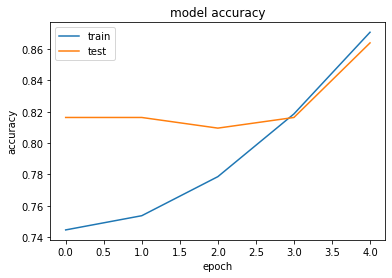

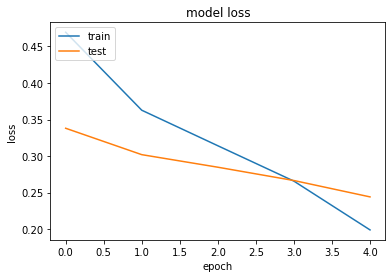

In [92]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

2/2 [==============================] - 4s 849ms/step
